In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from PIL import Image
import os
import numpy as np
from IPython.display import Image,display
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [22]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train',
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Test',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 694 images belonging to 2 classes.
Found 11 images belonging to 1 classes.


In [33]:
history=classifier.fit_generator(training_set,
                                    steps_per_epoch = 21,
                                    epochs = 10,
                                    validation_data = test_set)

Epoch 1/10
21/21 [==============================] - 4s 194ms/step - loss: 0.2407 - accuracy: 0.9122 - val_loss: 2.9688 - val_accuracy: 0.4545
Epoch 2/10
21/21 [==============================] - 4s 206ms/step - loss: 0.2433 - accuracy: 0.9033 - val_loss: 3.1128 - val_accuracy: 0.5455
Epoch 3/10
21/21 [==============================] - 4s 195ms/step - loss: 0.2203 - accuracy: 0.9094 - val_loss: 3.5155 - val_accuracy: 0.4545
Epoch 4/10
21/21 [==============================] - 4s 192ms/step - loss: 0.1987 - accuracy: 0.9275 - val_loss: 2.9170 - val_accuracy: 0.4545
Epoch 5/10
21/21 [==============================] - 4s 200ms/step - loss: 0.2231 - accuracy: 0.8988 - val_loss: 3.5680 - val_accuracy: 0.4545
Epoch 6/10
21/21 [==============================] - 4s 201ms/step - loss: 0.2136 - accuracy: 0.9230 - val_loss: 3.9287 - val_accuracy: 0.4545
Epoch 7/10
21/21 [==============================] - 4s 193ms/step - loss: 0.1849 - accuracy: 0.9290 - val_loss: 4.2682 - val_accuracy: 0.4545
Epoch 

In [36]:
def who(img_file):
    img_name = img_file

    test_image = image.load_img(img_name, target_size = (64, 64))

    display(Image(filename=img_name))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)


    result = classifier.predict(test_image)
    training_set.class_indices

    if result[0][0] == 0:
        prediction = 'Alien'
    else:
        prediction = 'Predator '
    print(prediction)

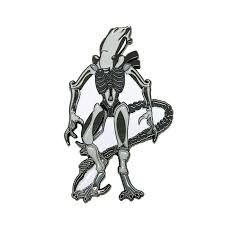

Alien




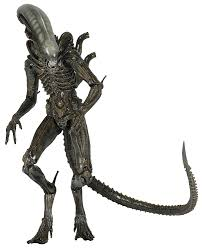

Alien




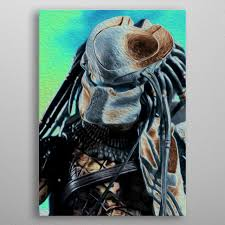

Predator 




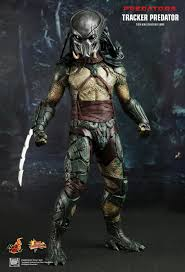

Predator 




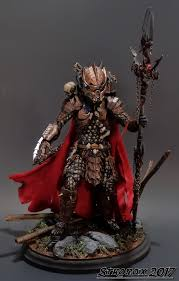

Predator 




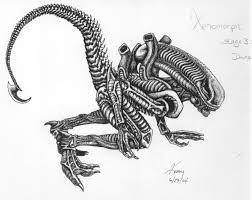

Predator 




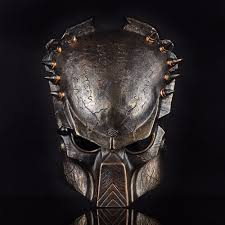

Predator 




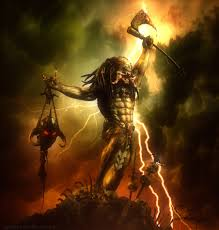

Predator 




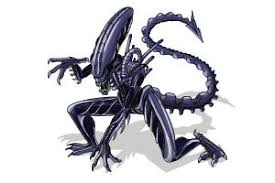

Alien




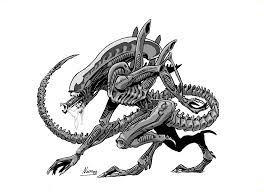

Alien




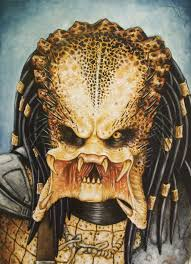

Predator 




In [37]:
path = 'Test'
files = []
for r, d, f in os.walk(path):
   for file in f:
     if '.jpg' in file:
       files.append(os.path.join(r, file))

for f in files:
   who(f)
   print('\n')